In [1]:
import pandas as pd
from utils import *

df = load_data()

In [2]:
# AI USE

low_metric = ['&lt;1', '1-4']

low = df[df['pre_frequency'].isin(low_metric)]
high = df[~df['pre_frequency'].isin(low_metric)]

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - AI USE')


ValueError: operands could not be broadcast together with shapes (68,) (40,) 

In [3]:
# knowledge

low = df[df['familiar_with_diabetes'] <= 4]
high = df[df['familiar_with_diabetes'] > 4]

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - knowledge')

ValueError: operands could not be broadcast together with shapes (61,) (47,) 

ANOVA F-value: nan, p-value: nan


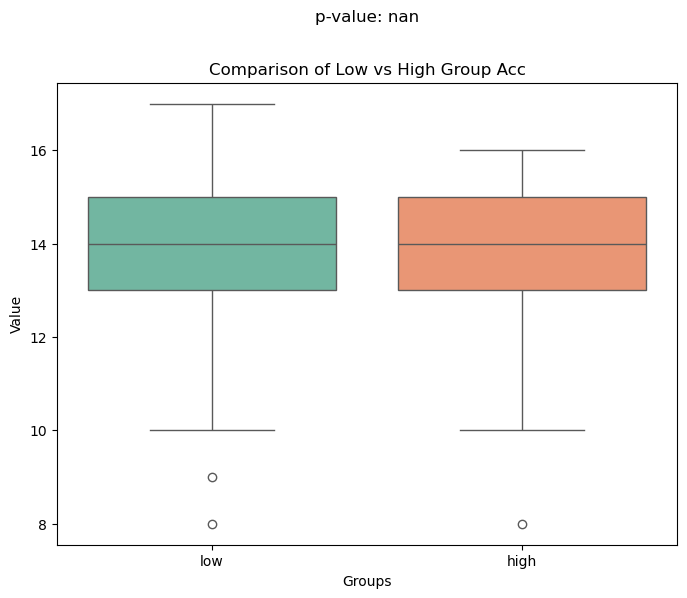

ANOVA F-value: nan, p-value: nan


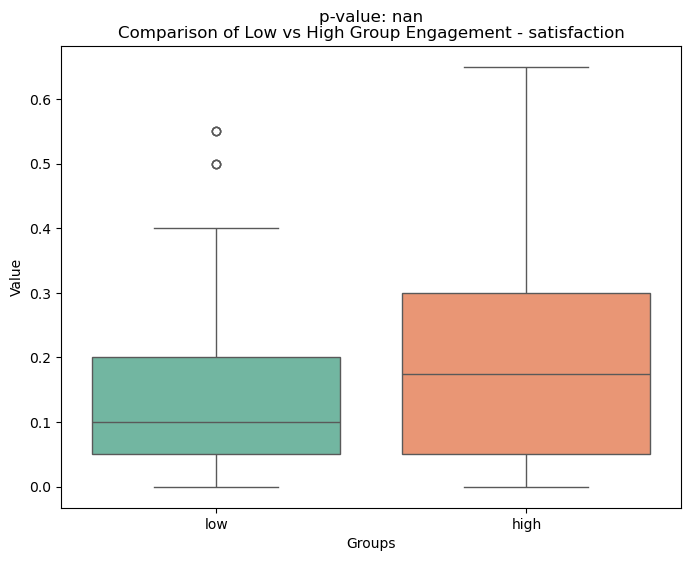

In [4]:
# satisfaction

low = df[df['pre_satisfaction'] <= 5]
high = df[df['pre_satisfaction'] > 5]

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - satisfaction')

ANOVA F-value: nan, p-value: nan


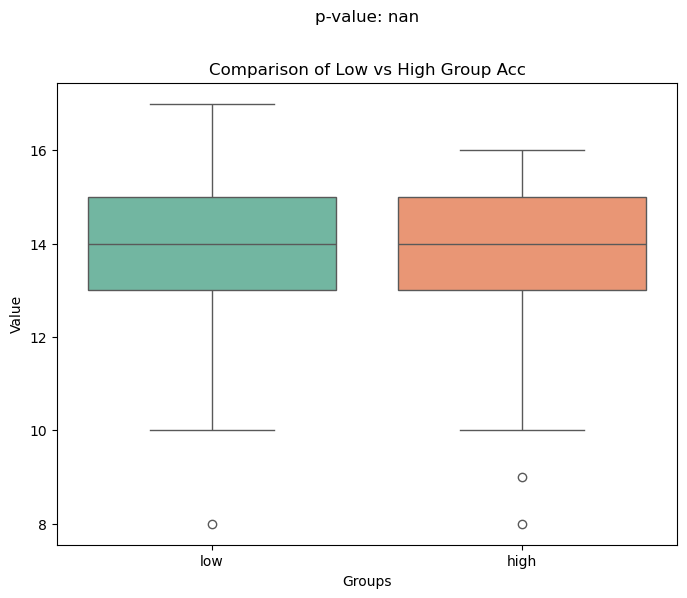

ANOVA F-value: nan, p-value: nan


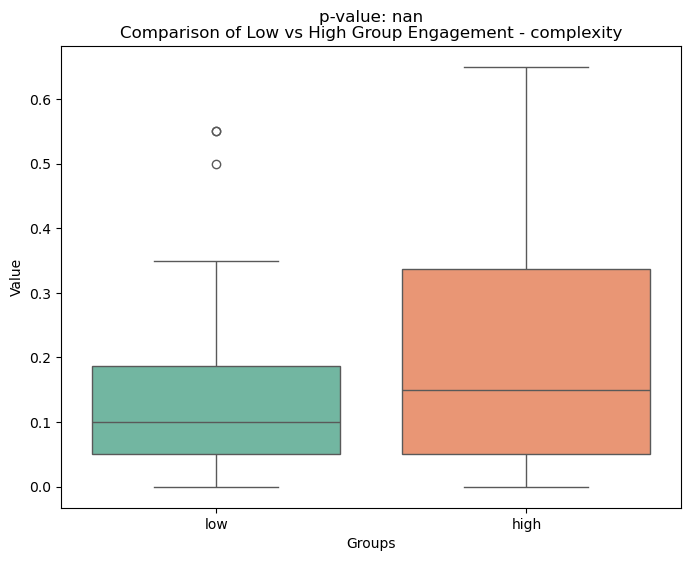

In [5]:
# complexity

low = df[df['pre_complexity'] <= 5]
high = df[df['pre_complexity'] > 5]

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - complexity')

ANOVA F-value: nan, p-value: nan


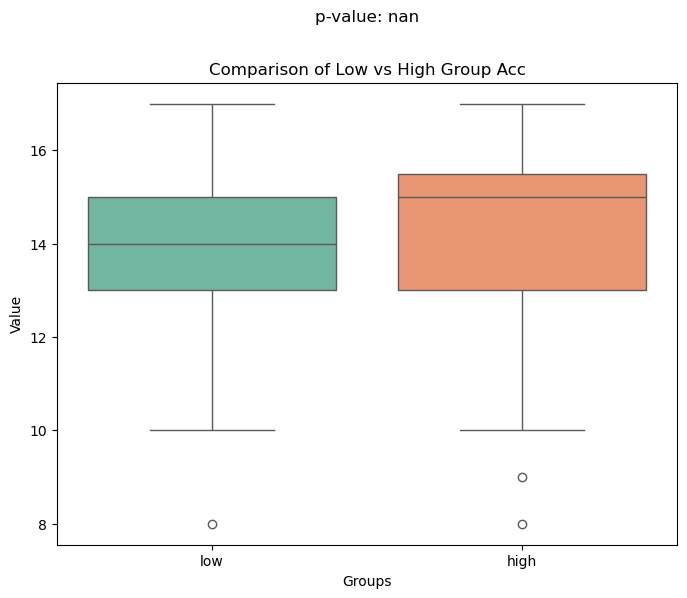

ANOVA F-value: nan, p-value: nan


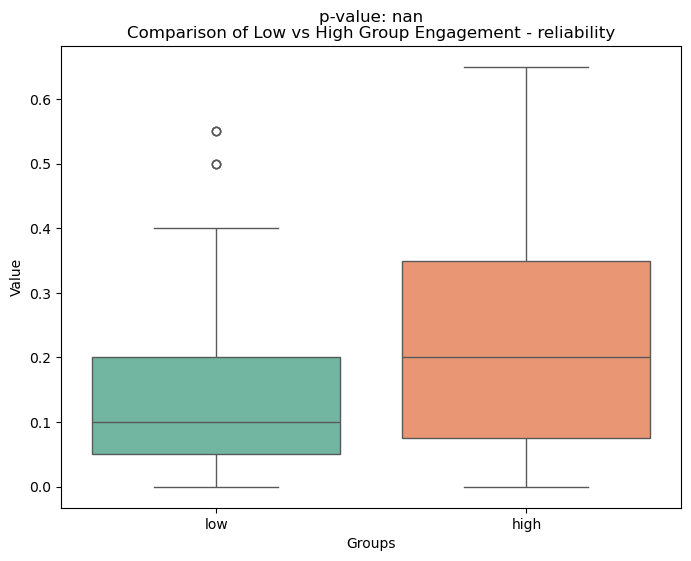

In [6]:
# reliability

low = df[df['pre_reliability'] <= 5]
high = df[df['pre_reliability'] > 5]

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - reliability')

ANOVA F-value: nan, p-value: nan


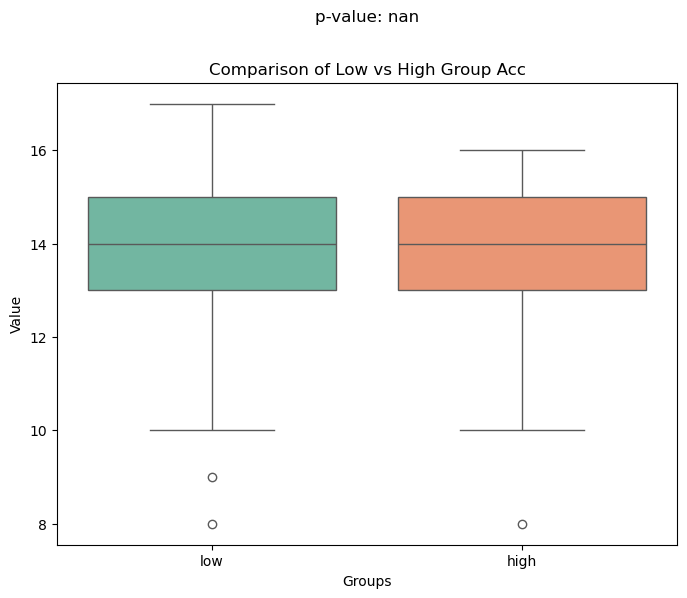

ANOVA F-value: nan, p-value: nan


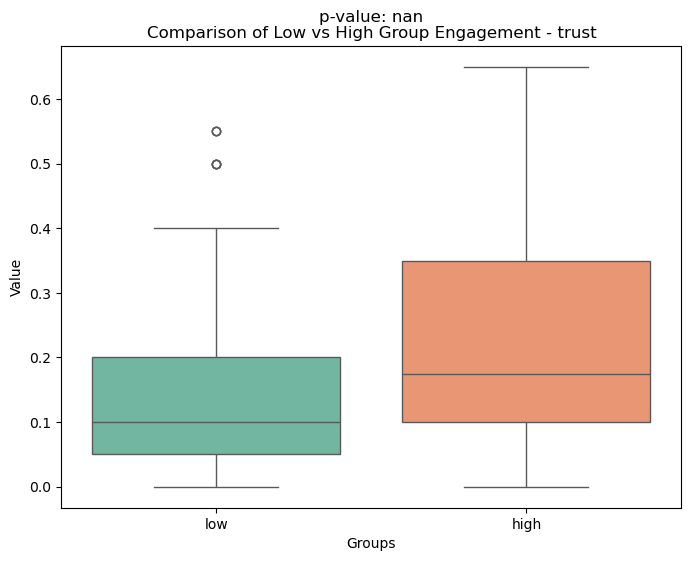

In [7]:
# trust

low = df[df['pre_trust'] <= 5]
high = df[df['pre_trust'] > 5]

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - trust')

ANOVA F-value: nan, p-value: nan


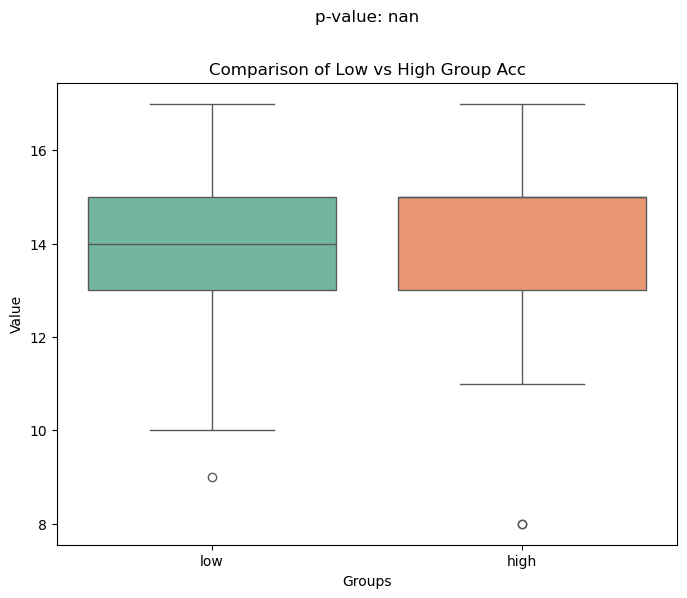

ANOVA F-value: nan, p-value: nan


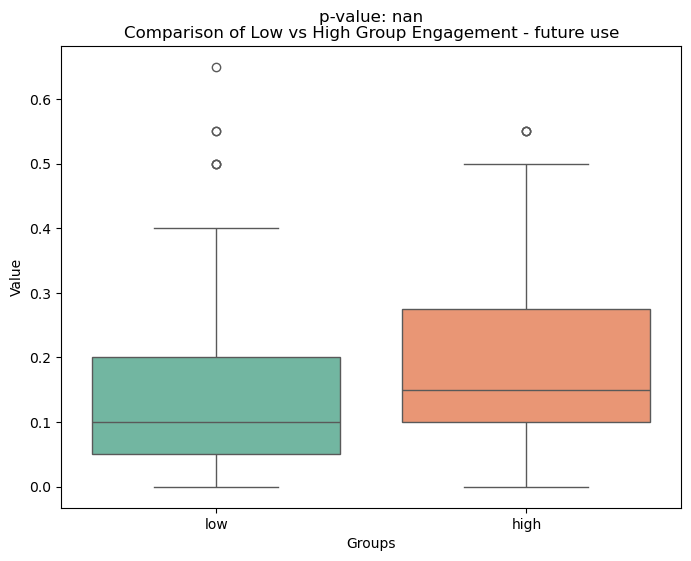

In [8]:
# future use

low = df[df['pre_future'] <= 5]
high = df[df['pre_future'] > 5]

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - future use')

ANOVA F-value: 0.16647555515349033, p-value: 0.8468665372394415


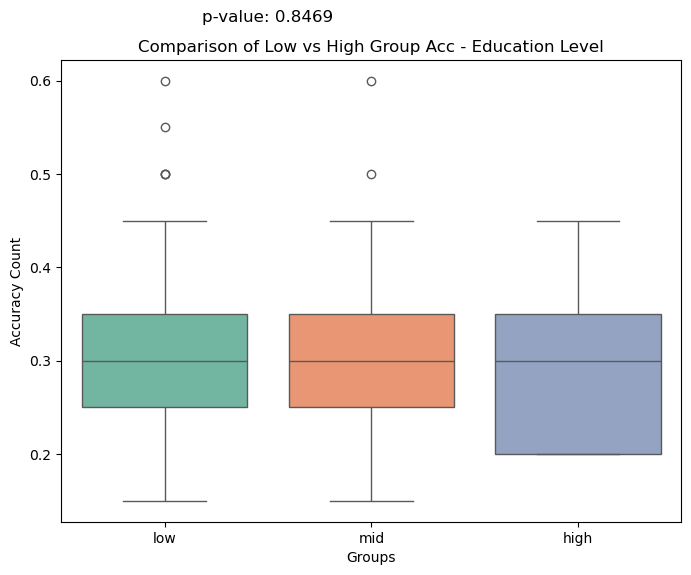

ANOVA F-value: 0.49580231347730397, p-value: 0.6105007192894207


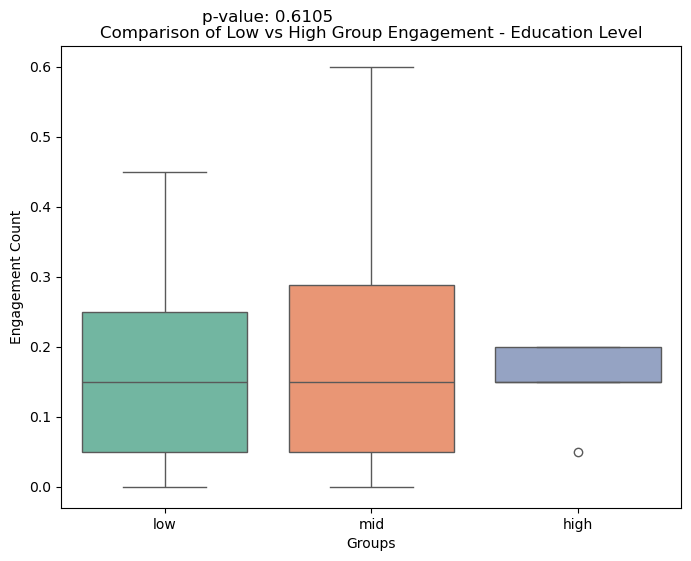

In [5]:
# education level

low_metric = ['High school degree']
mid_metric = ['College degree']
high_metric = ['PhD degree', "Master's degree"]

low = df[df['education'].isin(low_metric)]
mid = df[df['education'].isin(mid_metric)]
high = df[df['education'].isin(high_metric)]

acc_data = {
    'low': [],
    'mid': [],
    'high': []
}
for index, row in low.iterrows():
    count = 0
    for i in range(1, 21):
        if row[f'{i}_gt'] != row[f'{i}_3']:
            count += 1
    acc_data['low'].append(count/20)

for index, row in mid.iterrows():
    count = 0
    for i in range(1, 21):
        if row[f'{i}_gt'] != row[f'{i}_3']:
            count += 1
    acc_data['mid'].append(count/20)

for index, row in high.iterrows():
    count = 0
    for i in range(1, 21):
        if row[f'{i}_gt'] != row[f'{i}_3']:
            count += 1
    acc_data['high'].append(count/20)


df_data = pd.DataFrame.from_dict(acc_data, orient='index').transpose()
f_val, p_val = stats.f_oneway(acc_data['low'], acc_data['mid'], acc_data['high'])
print(f"ANOVA F-value: {f_val}, p-value: {p_val}")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_data, palette="Set2")
plt.title('Comparison of Low vs High Group Acc - Education Level')
plt.ylabel('Accuracy Count')
plt.xlabel('Groups')

plt.text(0.5, max(df_data.max()) + 0.1*max(df_data.max()), f'p-value: {p_val:.4f}', 
        ha='center', va='bottom', fontsize=12)
plt.show()


# engagement
engagement_data = {
    'low': [],
    'mid': [],
    'high': []
}

for index, row in low.iterrows():
    count = 0
    for i in range(1, 21):
        if row[f'{i}_1'] != row[f'{i}_3']:
            count += 1
    engagement_data['low'].append(count/20)

for index, row in mid.iterrows():
    count = 0
    for i in range(1, 21):
        if row[f'{i}_1'] != row[f'{i}_3']:
            count += 1
    engagement_data['mid'].append(count/20)

for index, row in high.iterrows():
    count = 0
    for i in range(1, 21):
        if row[f'{i}_1'] != row[f'{i}_3']:
            count += 1
    engagement_data['high'].append(count/20)


df_data = pd.DataFrame.from_dict(engagement_data, orient='index').transpose()
f_val, p_val = stats.f_oneway(engagement_data['low'], engagement_data['mid'], engagement_data['high'])
print(f"ANOVA F-value: {f_val}, p-value: {p_val}")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_data, palette="Set2")
plt.title('Comparison of Low vs High Group Engagement - Education Level')
plt.ylabel('Engagement Count')
plt.xlabel('Groups')

plt.text(0.5, max(df_data.max()) + 0.1*max(df_data.max()), f'p-value: {p_val:.4f}', 
        ha='center', va='bottom', fontsize=12)
plt.show()

(54, 286) (54, 286)
Skewness of differences: -0.3689
Wilcoxon test statistic: 357.0, p-value: 0.009966714188654533


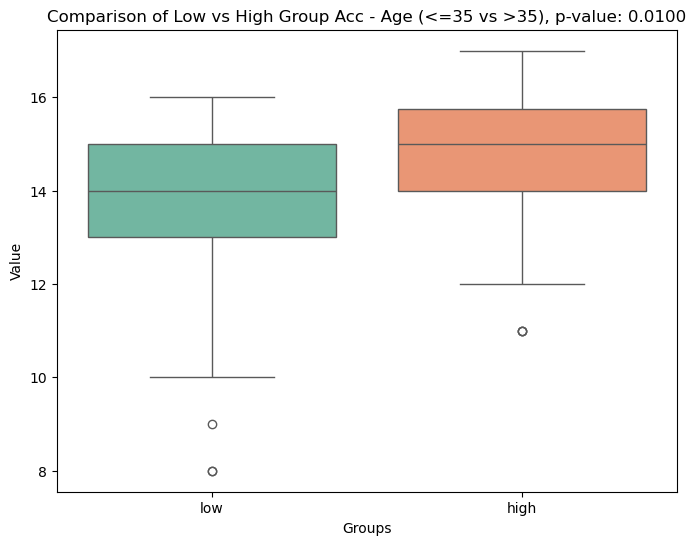

Skewness of differences: -0.2268
Wilcoxon test statistic: 349.0, p-value: 0.03619112753492307


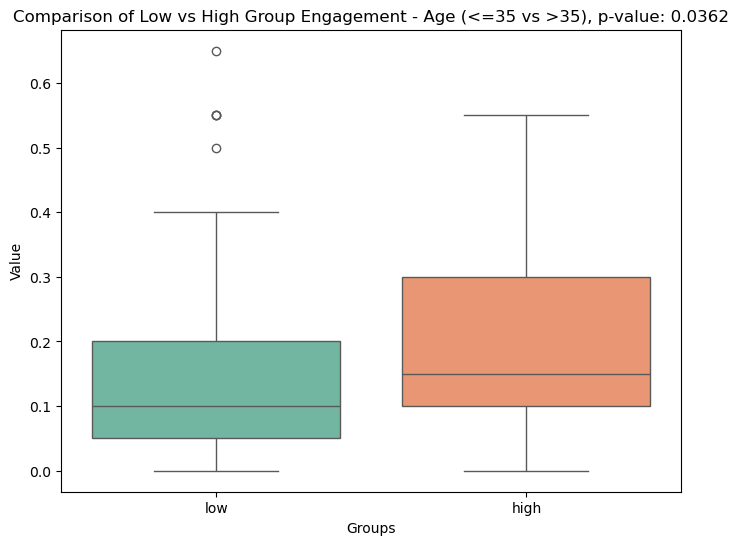

In [4]:
# age

low = df[df['age'] <= 35]
high = df[df['age'] > 35]

print(low.shape, high.shape)

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc - Age (<=35 vs >35)')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - Age (<=35 vs >35)')

In [ ]:
# age

low = df[df['age'] <= 35]
high = df[df['age'] > 35]

print(low.shape, high.shape)

data = get_step3_acc(low, high)
engagement_data = get_engagement(low, high)
plot_unequal(data, 'Comparison of Low vs High Group Acc - Age (<=35 vs >35)')
plot_unequal(engagement_data, 'Comparison of Low vs High Group Engagement - Age (<=35 vs >35)')